In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import matplotlib.cm as cm

# Leer el Excel
df = pd.read_excel(r'C:\Users\pablo\OneDrive\Documentos\Programas', sheet_name='IGG')

# Reorganizar a formato largo
df_long = pd.DataFrame()
for i in range(1, 5):
    sero_col = f'SEROLOGIA {i}'
    dia_col = 'DIAS DESDE CLINCA' if i == 3 else ('DIAS' if i == 4 else 'DIAS DESDE CLINICA' if i == 1 else 'DIAS DESDE CLINICA.1')
    temp = df[['PACIENTE', sero_col, dia_col]].dropna()
    temp.columns = ['PACIENTE', 'SEROLOGIA', 'DIAS']
    df_long = pd.concat([df_long, temp], ignore_index=True)

# Limpiar y preparar datos
df_long = df_long[df_long['DIAS'].astype(str).str.lower() != 'desconocido']
df_long['DIAS'] = pd.to_numeric(df_long['DIAS'], errors='coerce')
df_long = df_long.dropna()

def extraer_fraccion_mejorado(texto):
    texto = str(texto).upper().strip()
    if 'IGG + DEBIL' in texto:
        return 'Positivo débil'
    match = re.search(r'1/\d+', texto)
    if match:
        return match.group(0)
    elif 'NEG' in texto:
        return 'Negativo'
    else:
        return None

df_long['FRACCION'] = df_long['SEROLOGIA'].apply(extraer_fraccion_mejorado)
df_long = df_long.dropna(subset=['FRACCION'])

# Asignar posición numérica en eje Y
fracciones_orden = ['Negativo', 'Positivo débil', '1/64', '1/128', '1/256', '1/512']
fraccion_to_y = {frac: idx for idx, frac in enumerate(fracciones_orden)}
df_long['Y_POS'] = df_long['FRACCION'].map(fraccion_to_y)

# Preparar gráfico
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Crear paleta de colores únicos más distinguibles
import colorsys

def generate_distinct_colors(n):
    hues = np.linspace(0, 1, n, endpoint=False)
    colors = [colorsys.hsv_to_rgb(h, 0.75, 0.85) for h in hues]
    return colors

pacientes = df_long['PACIENTE'].unique()
colores = generate_distinct_colors(len(pacientes))

# Graficar
for idx, (paciente, grupo) in enumerate(df_long.groupby('PACIENTE')):
    grupo = grupo.sort_values('DIAS')
    x = grupo['DIAS'].values
    y = grupo['Y_POS'].values
    ax.plot(x, y, marker='o', label=f'Paciente {int(paciente)}', color=colores[idx], linewidth=2)
    ax.scatter(x, y, color=colores[idx], edgecolor='black', zorder=5)

# Línea de corte en 1/64
limite_y = fraccion_to_y['1/64']
ax.axhline(y=limite_y, color='green', linestyle='--', linewidth=2)
ax.text(df_long['DIAS'].max() - 25, limite_y + 0.1, 'Límite de positividad (1/64)', color='green', fontsize=16, weight='bold')

# Ejes y leyenda
ax.set_yticks(range(len(fracciones_orden)))
ax.set_yticklabels(fracciones_orden)
ax.set_xlabel('Días desde inicio clínica', fontsize=12)
ax.set_ylabel('Título IgG', fontsize=12)
ax.legend(title='Paciente', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xticks(range(0, int(df_long['DIAS'].max()) + 7, 7))

plt.tight_layout()
plt.show()


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\pablo\\OneDrive\\Documentos\\Programas'

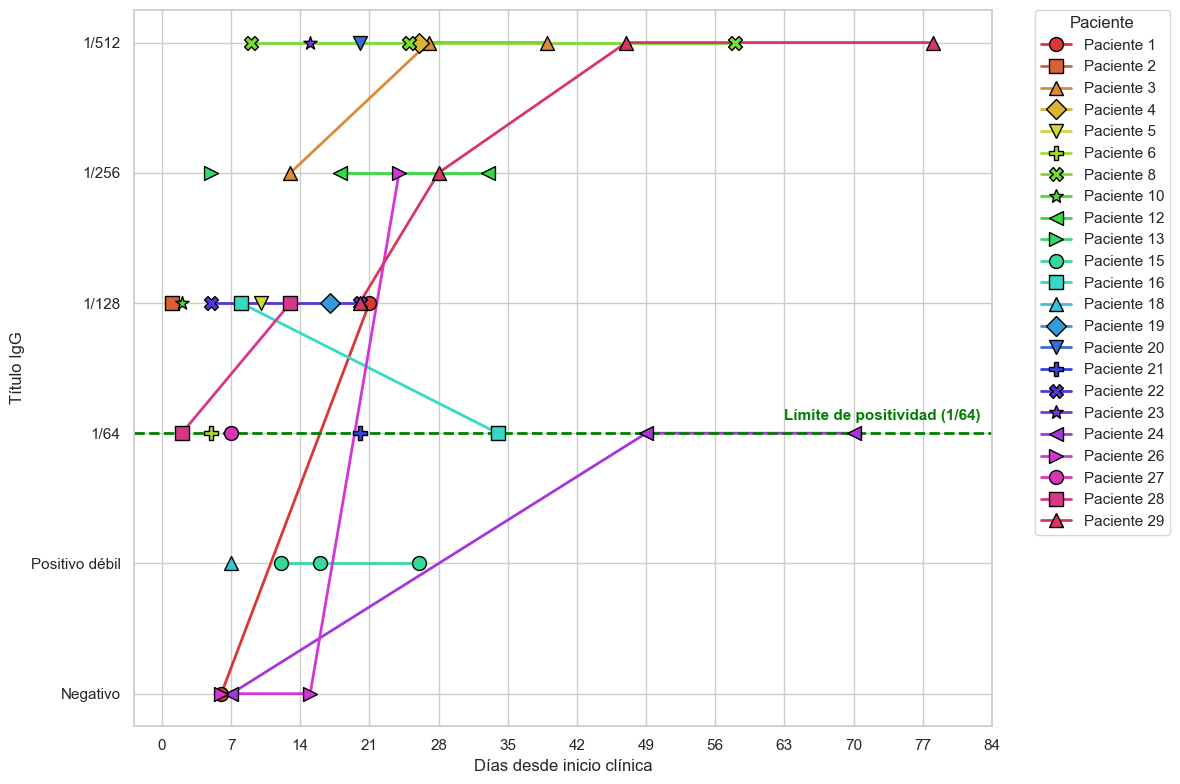

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import matplotlib.cm as cm

# Leer el Excel
df = pd.read_excel(r'C:\Users\pablo\OneDrive\Documentos\Programas', sheet_name='IGG')

# Reorganizar a formato largo
df_long = pd.DataFrame()
for i in range(1, 5):
    sero_col = f'SEROLOGIA {i}'
    dia_col = 'DIAS DESDE CLINCA' if i == 3 else ('DIAS' if i == 4 else 'DIAS DESDE CLINICA' if i == 1 else 'DIAS DESDE CLINICA.1')
    temp = df[['PACIENTE', sero_col, dia_col]].dropna()
    temp.columns = ['PACIENTE', 'SEROLOGIA', 'DIAS']
    df_long = pd.concat([df_long, temp], ignore_index=True)

# Limpiar y preparar datos
df_long = df_long[df_long['DIAS'].astype(str).str.lower() != 'desconocido']
df_long['DIAS'] = pd.to_numeric(df_long['DIAS'], errors='coerce')
df_long = df_long.dropna()

def extraer_fraccion_mejorado(texto):
    texto = str(texto).upper().strip()
    if 'IGG + DEBIL' in texto:
        return 'Positivo débil'
    match = re.search(r'1/\d+', texto)
    if match:
        return match.group(0)
    elif 'NEG' in texto:
        return 'Negativo'
    else:
        return None

df_long['FRACCION'] = df_long['SEROLOGIA'].apply(extraer_fraccion_mejorado)
df_long = df_long.dropna(subset=['FRACCION'])

# Asignar posición numérica en eje Y
fracciones_orden = ['Negativo', 'Positivo débil', '1/64', '1/128', '1/256', '1/512']
fraccion_to_y = {frac: idx for idx, frac in enumerate(fracciones_orden)}
df_long['Y_POS'] = df_long['FRACCION'].map(fraccion_to_y)

# Preparar gráfico
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Crear paleta de colores únicos más distinguibles
import colorsys

def generate_distinct_colors(n):
    hues = np.linspace(0, 1, n, endpoint=False)
    colors = [colorsys.hsv_to_rgb(h, 0.75, 0.85) for h in hues]
    return colors

# Lista de marcadores para alternar
marcadores = ['o', 's', '^', 'D', 'v', 'P', 'X', '*', '<', '>']

# Asignar colores y marcadores
pacientes = df_long['PACIENTE'].unique()
colores = generate_distinct_colors(len(pacientes))

# Graficar
for idx, (paciente, grupo) in enumerate(df_long.groupby('PACIENTE')):
    grupo = grupo.sort_values('DIAS')
    x = grupo['DIAS'].values
    y = grupo['Y_POS'].values
    marker = marcadores[idx % len(marcadores)]
    
    # Línea conectando puntos
    ax.plot(x, y, label=f'Paciente {int(paciente)}', color=colores[idx], linewidth=2)
    # Puntos individuales con marcador alternado
    ax.scatter(x, y, color=colores[idx], edgecolor='black', marker=marker, s=100, zorder=5)

from matplotlib.lines import Line2D

# Crear manejadores personalizados para la leyenda
legend_elements = []

for idx, paciente in enumerate(pacientes):
    marker = marcadores[idx % len(marcadores)]
    color = colores[idx]
    legend_elements.append(Line2D(
        [0], [0],
        marker=marker,
        color=color,
        label=f'Paciente {int(paciente)}',
        markerfacecolor=color,
        markeredgecolor='black',
        markersize=10,
        linewidth=2
    ))

# Añadir al gráfico
ax.legend(handles=legend_elements, title='Paciente', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# Línea de corte en 1/64
limite_y = fraccion_to_y['1/64']
ax.axhline(y=limite_y, color='green', linestyle='--', linewidth=2)
ax.text(df_long['DIAS'].max() - 15, limite_y + 0.1, 'Límite de positividad (1/64)', color='green', fontsize=11, weight='bold')

# Ejes y leyenda
ax.set_yticks(range(len(fracciones_orden)))
ax.set_yticklabels(fracciones_orden)
ax.set_xlabel('Días desde inicio clínica', fontsize=12)
ax.set_ylabel('Título IgG', fontsize=12)
ax.legend(handles=legend_elements, title='Paciente', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xticks(range(0, int(df_long['DIAS'].max()) + 7, 7))

plt.tight_layout()
plt.show()


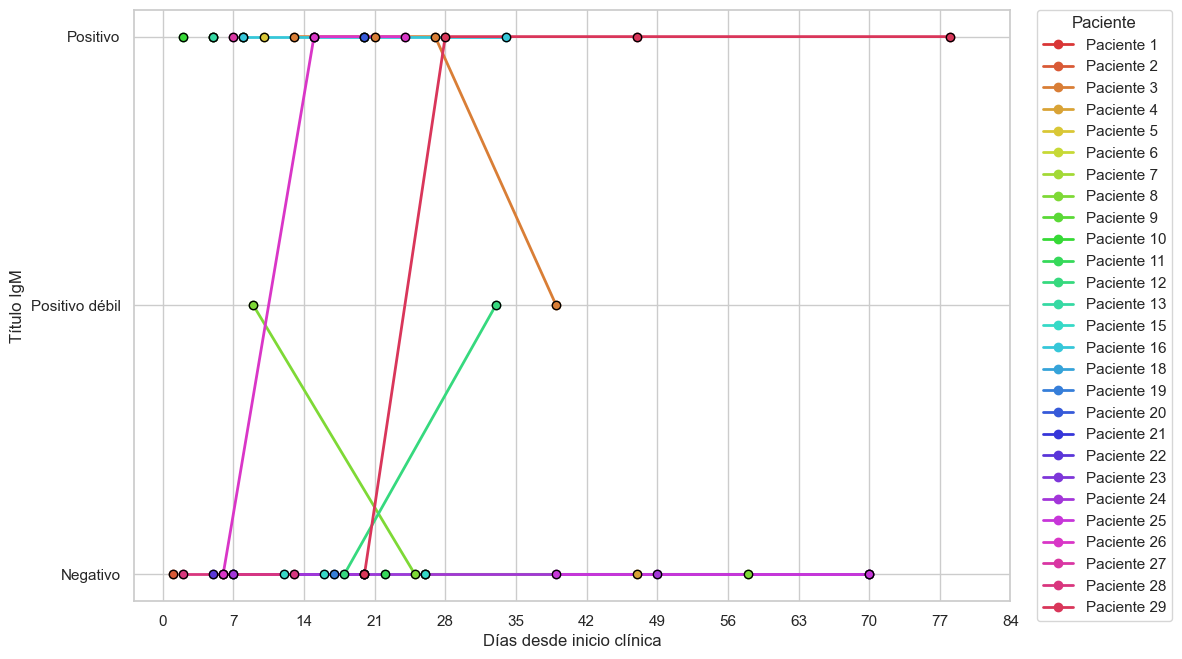

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import matplotlib.cm as cm

# Leer el Excel
df = pd.read_excel(r'C:\Users\pablo\Escritorio\Programas\serologias.xlsx', sheet_name='IGM')

# Reorganizar a formato largo
df_long = pd.DataFrame()
for i in range(1, 5):
    sero_col = f'SEROLOGIA {i}'
    dia_col = 'DIAS DESDE CLINCA' if i == 3 else ('DIAS' if i == 4 else 'DIAS DESDE CLINICA' if i == 1 else 'DIAS DESDE CLINICA.1')
    temp = df[['PACIENTE', sero_col, dia_col]].dropna()
    temp.columns = ['PACIENTE', 'SEROLOGIA', 'DIAS']
    df_long = pd.concat([df_long, temp], ignore_index=True)

# Limpiar y preparar datos
df_long = df_long[df_long['DIAS'].astype(str).str.lower() != 'desconocido']
df_long['DIAS'] = pd.to_numeric(df_long['DIAS'], errors='coerce')
df_long = df_long.dropna()

# Extraer clasificación IGM
def clasificar_igm(texto):
    texto = str(texto).upper().strip()
    if 'NEG' in texto:
        return 'Negativo'
    elif '+ DEBIL' in texto:
        return 'Positivo débil'
    elif '+' in texto:
        return 'Positivo'
    else:
        return None

df_long['CLASIFICACION'] = df_long['SEROLOGIA'].apply(clasificar_igm)
df_long = df_long.dropna(subset=['CLASIFICACION'])

# Orden del eje Y
orden_clasificacion = ['Negativo', 'Positivo débil', 'Positivo']
clasif_to_y = {c: i for i, c in enumerate(orden_clasificacion)}
df_long['Y_POS'] = df_long['CLASIFICACION'].map(clasif_to_y)

# Preparar gráfico
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Paleta continua para muchos pacientes
pacientes = df_long['PACIENTE'].unique()
# Crear paleta de colores únicos más distinguibles
import colorsys

def generate_distinct_colors(n):
    hues = np.linspace(0, 1, n, endpoint=False)
    colors = [colorsys.hsv_to_rgb(h, 0.75, 0.85) for h in hues]
    return colors

pacientes = df_long['PACIENTE'].unique()
colores = generate_distinct_colors(len(pacientes))


# Graficar
for idx, (paciente, grupo) in enumerate(df_long.groupby('PACIENTE')):
    grupo = grupo.sort_values('DIAS')
    x = grupo['DIAS'].values
    y = grupo['Y_POS'].values
    ax.plot(x, y, marker='o', label=f'Paciente {int(paciente)}', color=colores[idx], linewidth=2)
    ax.scatter(x, y, color=colores[idx], edgecolor='black', zorder=5)

# Ejes y leyenda
ax.set_yticks(range(len(orden_clasificacion)))
ax.set_yticklabels(orden_clasificacion)
ax.set_xlabel('Días desde inicio clínica', fontsize=12)
ax.set_ylabel('Título IgM', fontsize=12)
ax.legend(title='Paciente', bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0., markerscale=1)
ax.set_xticks(range(0, int(df_long['DIAS'].max()) + 7, 7))

plt.tight_layout()
plt.show()


C:\Users\pablo\AppData\Local\Temp\ipykernel_9596\2424543030.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hsv', len(pacientes))


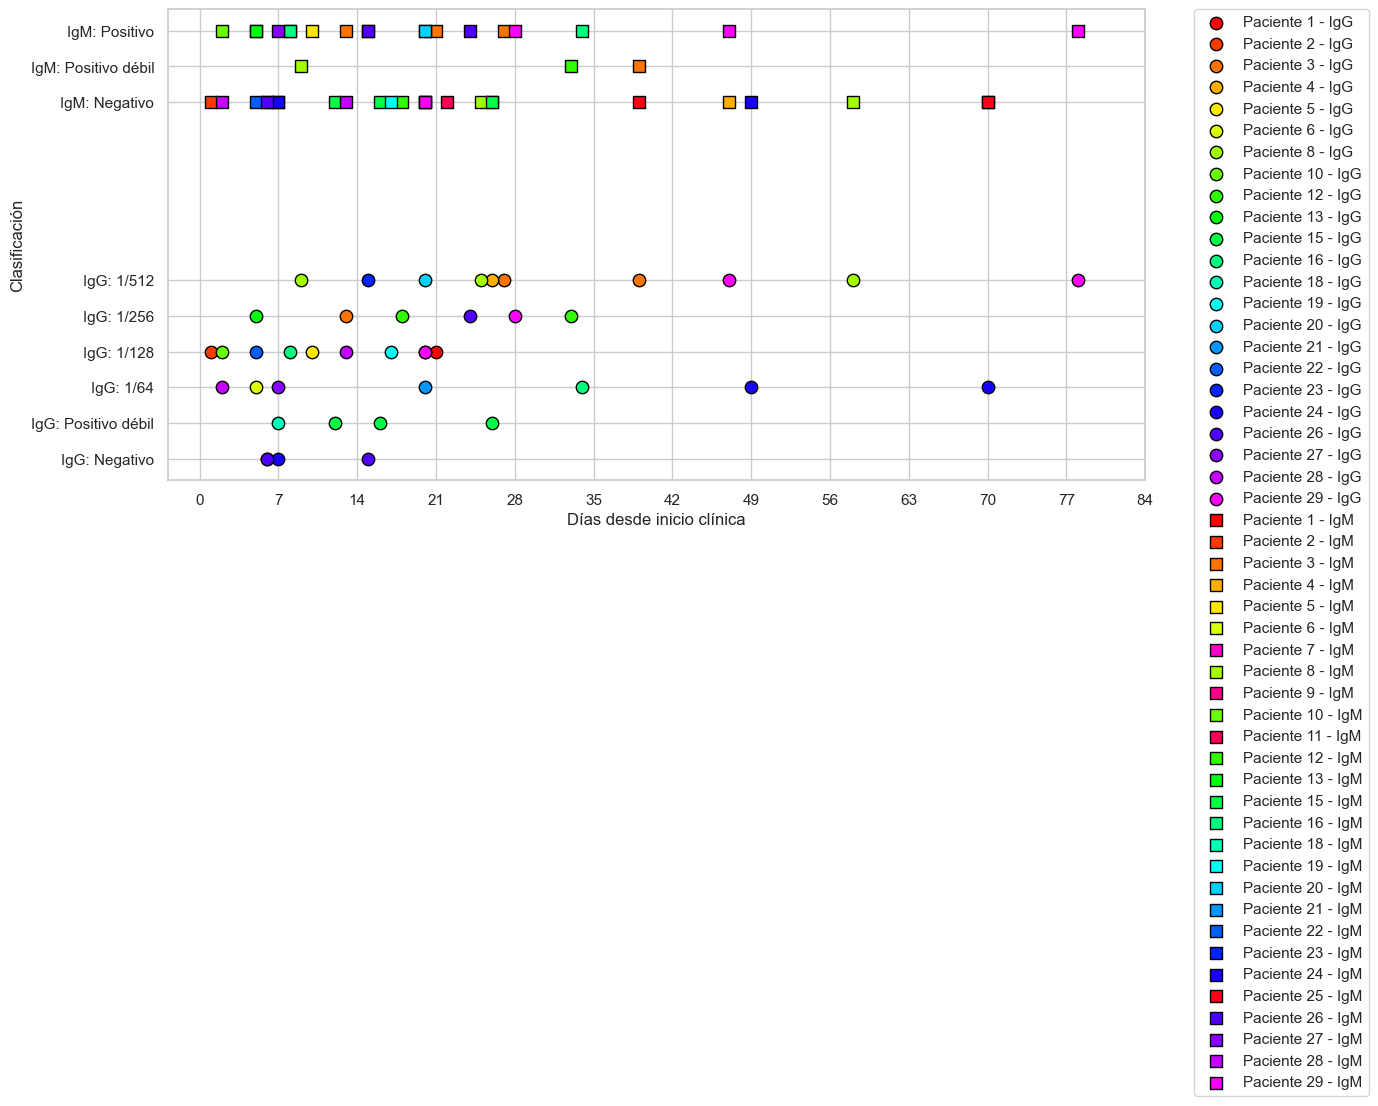

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import matplotlib.cm as cm

# Función para preparar datos
def preparar_df(df, tipo):
    df_long = pd.DataFrame()
    for i in range(1, 5):
        sero_col = f'SEROLOGIA {i}'
        dia_col = 'DIAS DESDE CLINCA' if i == 3 else ('DIAS' if i == 4 else 'DIAS DESDE CLINICA' if i == 1 else 'DIAS DESDE CLINICA.1')
        temp = df[['PACIENTE', sero_col, dia_col]].dropna()
        temp.columns = ['PACIENTE', 'SEROLOGIA', 'DIAS']
        df_long = pd.concat([df_long, temp], ignore_index=True)

    df_long = df_long[df_long['DIAS'].astype(str).str.lower() != 'desconocido']
    df_long['DIAS'] = pd.to_numeric(df_long['DIAS'], errors='coerce')
    df_long = df_long.dropna()

    if tipo == 'IgG':
        def extraer(texto):
            texto = str(texto).upper().strip()
            if 'IGG + DEBIL' in texto:
                return 'Positivo débil'
            match = re.search(r'1/\d+', texto)
            if match:
                return match.group(0)
            elif 'NEG' in texto:
                return 'Negativo'
            else:
                return None
        orden = ['Negativo', 'Positivo débil', '1/64', '1/128', '1/256', '1/512']
    else:  # IgM
        def extraer(texto):
            texto = str(texto).upper().strip()
            if 'NEG' in texto:
                return 'Negativo'
            elif '+ DEBIL' in texto:
                return 'Positivo débil'
            elif '+' in texto:
                return 'Positivo'
            else:
                return None
        orden = ['Negativo', 'Positivo débil', 'Positivo']

    df_long['FRACCION'] = df_long['SEROLOGIA'].apply(extraer)
    df_long = df_long.dropna(subset=['FRACCION'])
    df_long['Y_POS'] = df_long['FRACCION'].map({v: i for i, v in enumerate(orden)})
    df_long['TIPO'] = tipo
    df_long['FRACCION_ORDENADA'] = pd.Categorical(df_long['FRACCION'], categories=orden, ordered=True)
    return df_long, orden

# Cargar y preparar ambos
df_igg = pd.read_excel(r'C:\Users\pablo\Escritorio\Programas\serologias.xlsx', sheet_name='IGG')
df_igm = pd.read_excel(r'C:\Users\pablo\Escritorio\Programas\serologias.xlsx', sheet_name='IGM')

df_igg_long, orden_igg = preparar_df(df_igg, 'IgG')
df_igm_long, orden_igm = preparar_df(df_igm, 'IgM')

# Estandarizar eje Y con etiquetas combinadas
df_comb = pd.concat([df_igg_long, df_igm_long], ignore_index=True)
df_comb['Y_GLOBAL'] = df_comb.groupby('TIPO')['Y_POS'].transform(lambda y: y + 10 if df_comb['TIPO'].iloc[y.index[0]] == 'IgM' else y)

# Plot combinado
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(14, 9))

pacientes = df_comb['PACIENTE'].unique()
cmap = cm.get_cmap('hsv', len(pacientes))
colores = {paciente: cmap(i) for i, paciente in enumerate(pacientes)}

# Graficar IgG con círculos
for paciente, grupo in df_comb[df_comb['TIPO'] == 'IgG'].groupby('PACIENTE'):
    ax.scatter(grupo['DIAS'], grupo['Y_GLOBAL'], label=f'Paciente {int(paciente)} - IgG', color=colores[paciente], edgecolor='black', marker='o', s=80)

# Graficar IgM con cuadrados
for paciente, grupo in df_comb[df_comb['TIPO'] == 'IgM'].groupby('PACIENTE'):
    ax.scatter(grupo['DIAS'], grupo['Y_GLOBAL'], label=f'Paciente {int(paciente)} - IgM', color=colores[paciente], edgecolor='black', marker='s', s=80)

# Etiquetas Y combinadas
labels_igg = [f'IgG: {f}' for f in orden_igg]
labels_igm = [f'IgM: {f}' for f in orden_igm]
yticks = list(range(len(orden_igg))) + list(range(10, 10 + len(orden_igm)))
yticklabels = labels_igg + labels_igm

ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_xlabel('Días desde inicio clínica', fontsize=12)
ax.set_ylabel('Clasificación', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set_xticks(range(0, int(df_comb['DIAS'].max()) + 7, 7))

plt.tight_layout()
plt.show()
